어떻게 비용 함수가 최소가 되는 *W* 파라미터를 구할 수 있을까?

*W* 파라미터의 개수가 적다면 고차원 방정식으로 비용 함수가 최소가 되는 *W* 변수값을 도출할 수 있곘지만,   
*W* 파라미터가 많으면? -> 해결하기 어렵다.

`경사 하강법`은 이러한 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 뛰어난 방식이다.

경사 하강법은 `데이터를 기반으로 알고리즘이 스스로 학습한다`는 머신러닝의 개념을 가능하게 만들어준 핵심 기법의 하나이다.

경사 하강법의 사전적 의미인 '점진적인 하강' 이라는 뜻에서도 알 수 있듯이, '점진적으로' 반복적인 계산을 통해 *W* 파라미터 값을 업데이트하면서 오류 값이 최소가 되도록 하는 *W* 파라미터를 구하는 방식이다.

<br>

---

<br>



`경사 하강법` 은 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 *W* 파라밑러르 지속해서 보정해 나간다.    
최초 오류 값이 100이었다면 두 번째 오류 값은 100보다 작은 90, 세 번째는 80과 같은 방식으로 지속해서 오류를 감소시키는 방향으로 *W* 값을 계속 업데이트해 나간다.

그리고 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 *W* 값을 최적 파라미터로 반환한다.




> 경사 하강법의 핵심 **"어떻게 하면 오류가 작아지는 방향으로 *W*값을 보정할 수 있을까?"**


운동장에서 힘껏 야구공을 던지면 이 공의 속도가 처음에는 증가하다가 점차 감소하면서 땅에 떨어진다.   
처음에는 가속도가 계속 증가하면서 속도가 증가하고, 더 이상 가속도가 증가하지 않으면 그 때가 최고 속도이며, 그 후에는 가속도가 마이너스(-)가 되면서 속도가 떨어지고 마침내 공이 땅에 떨어진다.

<br>

비용 함수가 포물선 형태의 2차 함수라면, `경사 하강법`은 최초 *W*에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트한다.

마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그 때의 *W*를 반환한다.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(0)

# y = 4X + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2* np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

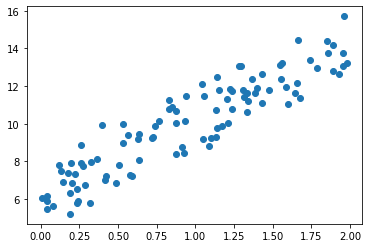

In [3]:
# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)


데이터는 y = 4X + 6을 중심으로 무작위로 퍼져 있다.

다음으로 비용 함수를 정의한다. 함수 get_cost()는 실제 y값과 예측된 y값을 인자로 받아 RSS를 계산해 반환한다.

In [5]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [6]:
# w1과 w0을 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y-y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행열 생성
  w0_factors = np.ones((N, 1))
  
  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [7]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
  # w0과 w1를 모두 0으로 초기화.
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [8]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  
  return cost

In [9]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w06.162
Gradient Descent Total Cost:0.9935


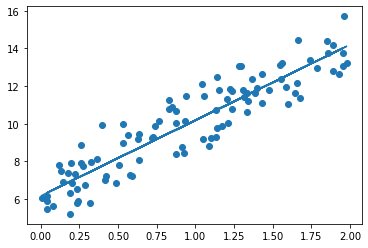

In [10]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [12]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))
  prev_cost = 100000
  iter_index = 0
  
  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X, y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]

    # 랜덤하게 batch_size 만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0


In [14]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0, 0], 3), "w0:", round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937
